In [ ]:
! git clone https://github.com/ds3001f25/linear_models_assignment.git

In [36]:
# Loading the data set for cars
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cars_dataset = pd.read_csv('linear_models_assignment/data/cars_hw.csv')
cars_dataset.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


Missing values pre cleaning the dataset
Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64


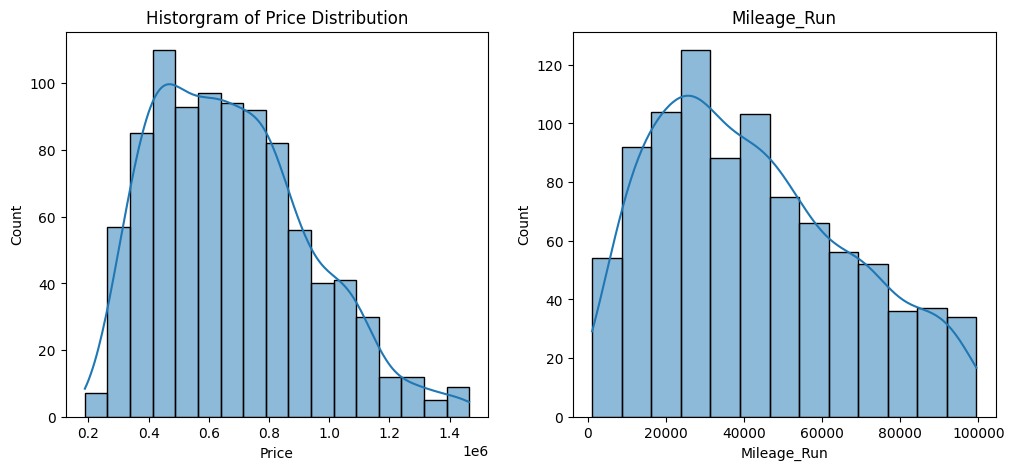

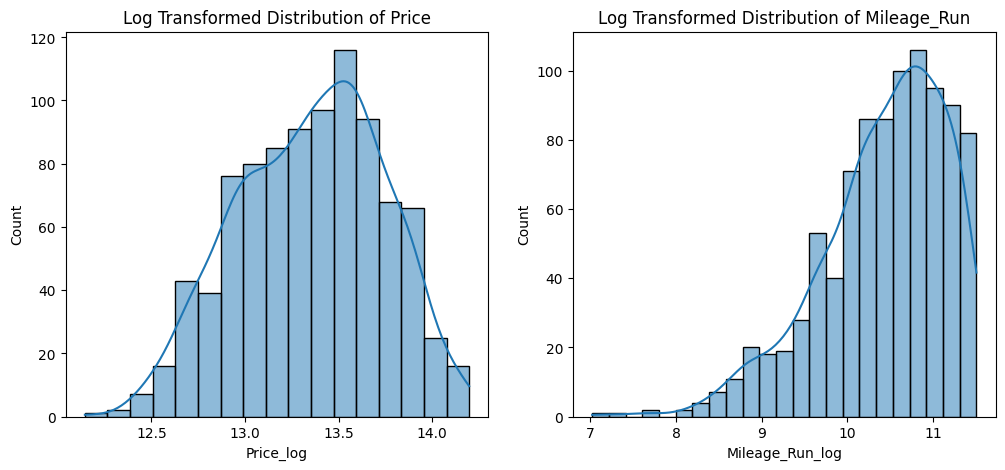


Missing values post cleaning:
Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
Price_log            0
Mileage_Run_log      0
dtype: int64


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,Price_log,Mileage_Run_log
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000,13.395441,10.705758
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000,13.432786,9.918672
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000,13.583580,10.293534
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000,12.933624,10.482374
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000,13.151924,10.131698


In [37]:
# Cleaning the data

# Checking for any missing values
print("Missing values pre cleaning the dataset")
print(cars_dataset.isnull().sum())

# Dropping the unamed:0 column
# cars_dataset = cars_dataset.drop('Unnamed: 0', axis=1)

# Identifying any outliers in the numerical column
Q1_price=cars_dataset['Price'].quantile(0.25)
Q3_price=cars_dataset['Price'].quantile(0.75)
IQR_price=Q3_price-Q1_price
cars_cleaned_dataset = cars_dataset[(cars_dataset['Price'] >= Q1_price - 1.5*IQR_price) & (cars_dataset['Price'] <= Q3_price + 1.5*IQR_price)].copy()

Q1_seatingcapacity=cars_dataset['Mileage_Run'].quantile(0.25)
Q3_seatingcapacity=cars_dataset['Mileage_Run'].quantile(0.75)
IQR_seatingcapacity=Q3_seatingcapacity-Q1_seatingcapacity
cars_cleaned_dataset = cars_cleaned_dataset[(cars_cleaned_dataset['Mileage_Run'] >= Q1_seatingcapacity - 1.5*IQR_seatingcapacity) & (cars_cleaned_dataset['Mileage_Run'] <= Q3_seatingcapacity + 1.5*IQR_seatingcapacity)].copy()

# Data transformation for any skewed variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(cars_cleaned_dataset['Price'], kde=True)
plt.title('Historgram of Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(x=cars_cleaned_dataset['Mileage_Run'], kde=True)
plt.title('Mileage_Run')
plt.show()

# A log transformation might be suitable for the price and seating capacity variables according to the distributions
cars_cleaned_dataset['Price_log'] = np.log1p(cars_cleaned_dataset['Price'])
cars_cleaned_dataset['Mileage_Run_log'] = np.log1p(cars_cleaned_dataset['Mileage_Run'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(cars_cleaned_dataset['Price_log'], kde=True)
plt.title('Log Transformed Distribution of Price')

plt.subplot(1, 2, 2)
sns.histplot(cars_cleaned_dataset['Mileage_Run_log'], kde=True)
plt.title('Log Transformed Distribution of Mileage_Run')
plt.show()

print("\nMissing values post cleaning:")
print(cars_cleaned_dataset.isnull().sum())

display(cars_cleaned_dataset.head())

Summary for the Price variable:


,Price
count,9.220000e+02
mean,6.768807e+05
std,2.563079e+05
min,1.880000e+05
25%,4.642500e+05
50%,6.470000e+05
75%,8.367500e+05
max,1.465000e+06


/tmp/ipython-input-2603987588.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cars_cleaned_dataset['Price'], shade=True, color='green')


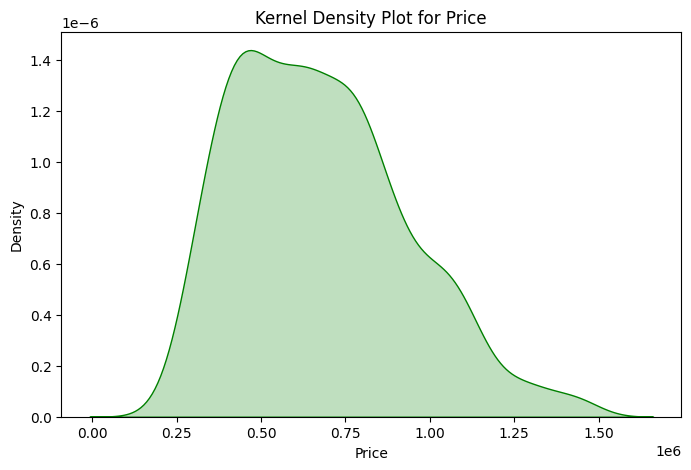


Summary of prices by their make:


,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,246606.366503,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,10503.967504,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,140927.699605,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,72.0,7.887222e+05,253474.460320,316000.0,580750.0,778500.0,912750.0,1411000.0
Hyundai,304.0,6.884375e+05,273012.825123,248000.0,484750.0,638000.0,836250.0,1464000.0
Jeep,1.0,1.290000e+06,NaN,1290000.0,1290000.0,1290000.0,1290000.0,1290000.0
Kia,1.0,1.369000e+06,NaN,1369000.0,1369000.0,1369000.0,1369000.0,1369000.0
Mahindra,18.0,1.100167e+06,175549.305961,796000.0,1037000.0,1094500.0,1157000.0,1465000.0
Maruti Suzuki,293.0,5.887850e+05,216019.860943,237000.0,411000.0,527000.0,764000.0,1163000.0


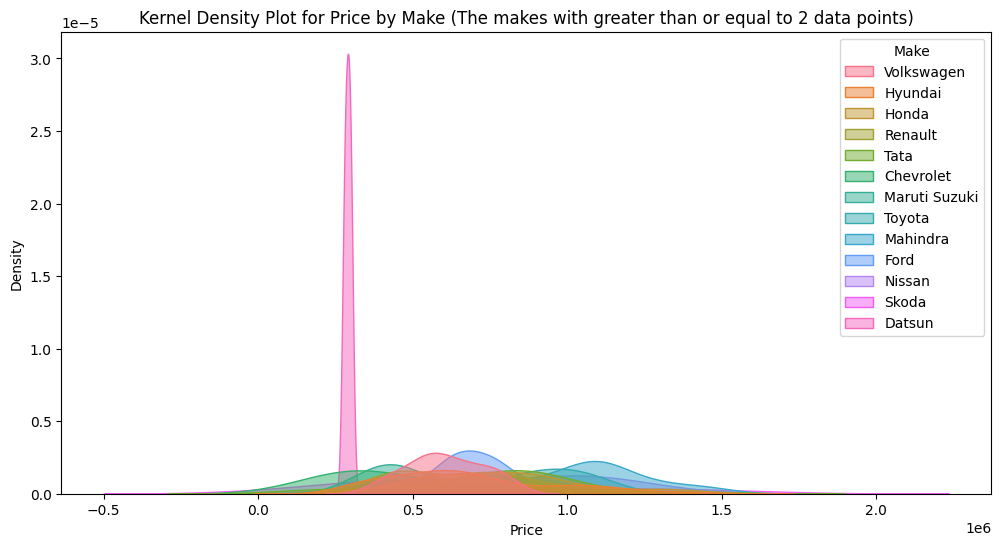

In [38]:
# Question 2.2: Summarizing and price and variable
print("Summary for the Price variable:")
display(cars_cleaned_dataset['Price'].describe())

# Kernel density plot for price
plt.figure(figsize=(8, 5))
sns.kdeplot(cars_cleaned_dataset['Price'], shade=True, color='green')
plt.title('Kernel Density Plot for Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Summarization of prices by make
print("\nSummary of prices by their make:")
display(cars_cleaned_dataset.groupby('Make')['Price'].describe())

# Grouped KDE by make
plt.figure(figsize=(12, 6))

# Taking out any Makes with fewer than 2 data points for KDE plot
make_counts = cars_cleaned_dataset['Make'].value_counts()
valid_makes = make_counts[make_counts >= 2].index
cars_plot = cars_cleaned_dataset[cars_cleaned_dataset['Make'].isin(valid_makes)]

sns.kdeplot(data=cars_plot, x='Price', hue='Make', fill=True, common_norm=False, alpha=0.5)
plt.title('Kernel Density Plot for Price by Make (The makes with greater than or equal to 2 data points)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [39]:
# Question 2.3: Splitting data into test and training sets
from sklearn.model_selection import train_test_split
# Defining x (features) and y (targets)
X = cars_cleaned_dataset[['Make_Year','Seating_Capacity','Mileage_Run_log']]
y = cars_cleaned_dataset['Price_log']
# Data splitting 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=63)

print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (461, 3)
y_train: (461,)

Testing set shapes:
X_test: (461, 3)
y_test: (461,)


In [40]:
# Question 2.4: Building and evaluating linear regressions
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# splitting numerical and categorical features
numerical_features = ['Make_Year', 'Mileage_Run_log', 'Seating_Capacity']
categorical_features = ['Make', 'Transmission_Type', 'Color', 'No_of_Owners', 'Fuel_Type', 'Body_Type', 'Transmission']

# Checking for all esisting categorical features in the cleaned dataset
categorical_features = [col for col in categorical_features if col in cars_cleaned_dataset.columns]

# Defining x - all features and y - target features using the cleaned dataset
y = cars_cleaned_dataset['Price_log']
X = cars_cleaned_dataset[categorical_features + numerical_features]

# Categorical features splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# First Model - Numeric values/variables only
print('Model 1: Only The Numerical Values')
X_training_numeric = X_train[numerical_features]
X_testing_numeric = X_test[numerical_features]

model_numeric = LinearRegression()
model_numeric.fit(X_training_numeric, y_train)

y_train_pred_numeric = model_numeric.predict(X_training_numeric)
y_test_pred_numeric = model_numeric.predict(X_testing_numeric)

r2_train_numeric = r2_score(y_train, y_train_pred_numeric)
rmse_train_numeric = np.sqrt(mean_squared_error(y_train, y_train_pred_numeric))
r2_test_numeric = r2_score(y_test, y_test_pred_numeric)
rmse_test_numeric = np.sqrt(mean_squared_error(y_test, y_test_pred_numeric))

print(f' Training set - R^2: {r2_train_numeric:.4f}, RMSE: {rmse_train_numeric:.4f}')
print(f' Testing set - R^2: {r2_test_numeric:.4f}, RMSE: {rmse_test_numeric:.4f}')
print ('-' * 30)

# Second Model - Categorical Variables only
print('Model 2: Only The Categorical Values')

# Creating a column transformer for one-hot encoding
# Dropped numerical features
preprocessor_categorical = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# Pipeline with preprocessor and linear regression
model_cat = Pipeline(steps=[
    ('preprocessor', preprocessor_categorical),
    ('regressor', LinearRegression())
])

model_cat.fit(X_train, y_train)

y_train_pred_cat = model_cat.predict(X_train)
y_test_pred_cat = model_cat.predict(X_test)

r2_train_cat = r2_score(y_train, y_train_pred_cat)
rmse_train_cat = np.sqrt(mean_squared_error(y_train, y_train_pred_cat))
r2_test_cat = r2_score(y_test, y_test_pred_cat)
rmse_test_cat = np.sqrt(mean_squared_error(y_test, y_test_pred_cat))

print(f' Training set - R^2: {r2_train_cat:.4f}, RMSE: {rmse_train_cat:.4f}')
print(f' Testing set - R^2: {r2_test_cat:.4f}, RMSE: {rmse_test_cat:.4f}')
print ('-' * 30)

# Third Model - Combining numerical and categorical variables
print('Model 3: Combining Numerical and Categorical')
# Column transformer for categorical and numerical features combined
preprocessor_combined = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# Pipeline with preprocessor and linear regression
model_combined = Pipeline(steps=[
    ('preprocessor', preprocessor_combined),
    ('regressor', LinearRegression())
])

model_combined.fit(X_train, y_train)

y_train_pred_combined = model_combined.predict(X_train)
y_test_pred_combined = model_combined.predict(X_test)

r2_train_combined = r2_score(y_train, y_train_pred_combined)
rmse_train_combined = np.sqrt(mean_squared_error(y_train, y_train_pred_combined))
r2_test_combined = r2_score(y_test, y_test_pred_combined)
rmse_test_combined = np.sqrt(mean_squared_error(y_test, y_test_pred_combined))

print(f' Training set - R^2: {r2_train_combined:.4f}, RMSE: {rmse_train_combined:.4f}')
print(f' Testing set - R^2: {r2_test_combined:.4f}, RMSE: {rmse_test_combined:.4f}')
print ('-' * 30)

# Model comparison
print('Model Comparison:')
print(f'Model 1 - Numeric Values: R^2: {r2_train_numeric:.4f}, RMSE: {rmse_train_numeric:.4f}')
print(f'Model 2 - Categorical Values: R^2: {r2_train_cat:.4f}, RMSE: {rmse_train_cat:.4f}')
print(f'Model 3 - Combined: R^2: {r2_train_combined:.4f}, RMSE: {rmse_train_combined:.4f}')


Model 1: Only The Numerical Values
 Training set - R^2: 0.4133, RMSE: 0.2985
 Testing set - R^2: 0.3226, RMSE: 0.3148
------------------------------
Model 2: Only The Categorical Values
 Training set - R^2: 0.5854, RMSE: 0.2509
 Testing set - R^2: 0.5058, RMSE: 0.2689
------------------------------
Model 3: Combining Numerical and Categorical
 Training set - R^2: 0.7746, RMSE: 0.1850
 Testing set - R^2: 0.7620, RMSE: 0.1866
------------------------------
Model Comparison:
Model 1 - Numeric Values: R^2: 0.4133, RMSE: 0.2985
Model 2 - Categorical Values: R^2: 0.5854, RMSE: 0.2509
Model 3 - Combined: R^2: 0.7746, RMSE: 0.1850


Model 1, which uses only numerical features, explains about 41% of the variance in the test data. Model 2, using only categorical features, performs better with an R2 of 0.5854 and a lower RMSE, suggesting that categorical variables capture more predictive information. The combined Model 3 achieves the strongest performance overall, with an R2 of 0.7746 and the lowest RMSE of 0.1850. This indicates a substantial improvement in predictive accuracy when both numerical and categorical variables are used together.


In [41]:
# Question 2.5: Using Polynomial features to expand the set of numerical values
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Splitting features into categorical and numerical
numerical_features = ['Make_Year', 'Mileage_Run_log', 'Seating_Capacity']
categorical_features = ['Make', 'Transmission_Type', 'Color', 'No_of_Owners', 'Fuel_Type', 'Body_Type', 'Transmission']

# Checking to make sure categorical features are present in the cleaned data
categorical_features = [col for col in categorical_features if col in cars_cleaned_dataset.columns]

# Defining all features (x) and target (y) using the cleaned data
X = cars_cleaned_dataset[categorical_features + numerical_features]
y = cars_cleaned_dataset['Price_log']
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lists storing results
degrees_expansion = range(1, 4)
r2_scores_test = []
rmse_scores_test = []

print ("Testing models w/ polynomial features")

for degree in degrees_expansion:
    # Create a column transformer for one-hot encoding
    preprocessor_poly_combined = ColumnTransformer(
        transformers=[
            ('num', PolynomialFeatures(degree=degree, include_bias=False), numerical_features), # Apply polynomial features
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # Apply one-hot encoding
        ],
        remainder='passthrough' # Keep other columns, if there are any
    )

    # Pipeline with preprocessor and linear regression
    model_poly_combined = Pipeline(steps=[
        ('preprocessor', preprocessor_poly_combined),
         ('regressor', LinearRegression())
         ])
    model_poly_combined.fit(X_train, y_train)

    # Checking the test set
    y_test_pred_poly_combined = model_poly_combined.predict(X_test)
    r2_test_poly_combined = r2_score(y_test, y_test_pred_poly_combined)
    rmse_test_poly_combined = np.sqrt(mean_squared_error(y_test, y_test_pred_poly_combined))
    r2_scores_test.append(r2_test_poly_combined)
    rmse_scores_test.append(rmse_test_poly_combined)
    print(f'Degree {degree} - Testing set - R^2: {r2_test_poly_combined:.4f}, RMSE: {rmse_test_poly_combined:.4f}')

# Identifying the best model based on R2 for the test set
best_degree_index = np.argmax(r2_scores_test)
best_degree = degrees_expansion[best_degree_index]
best_r2_test = r2_scores_test[best_degree_index]
best_rmse_test = rmse_scores_test[best_degree_index]

print(f'\nBest degree: {best_degree}, Best R^2: {best_r2_test:.4f}, Best RMSE: {best_rmse_test:.4f}')

#Comparing best model from part 4, combining models
print("\n--- Comparison to best model from previous step(4) ---")
print(f"  R^2 (Step 4 Combined): {r2_test_combined:.4f}")
print(f"  RMSE (Step 4 Combined): {rmse_test_combined:.4f}")

Testing models w/ polynomial features
Degree 1 - Testing set - R^2: 0.7620, RMSE: 0.1866
Degree 2 - Testing set - R^2: 0.7665, RMSE: 0.1848
Degree 3 - Testing set - R^2: 0.7745, RMSE: 0.1816

Best degree: 3, Best R^2: 0.7745, Best RMSE: 0.1816

--- Comparison to best model from previous step(4) ---
  R^2 (Step 4 Combined): 0.7620
  RMSE (Step 4 Combined): 0.1866


The polynomial model achieved a slightly higher R² and a lower RMSE compared to the best combined model from Step 4. This indicates a modest improvement in predictive accuracy when polynomial features were included. The results suggest that incorporating polynomial terms helped the model capture mild nonlinear relationships between features and the target variable, though the performance gain was not dramatic.

Best Model (Polynomial Features Degree 3 + Categorical) Performance on Test Set:
  R^2: 0.7745
  RMSE: 0.1816


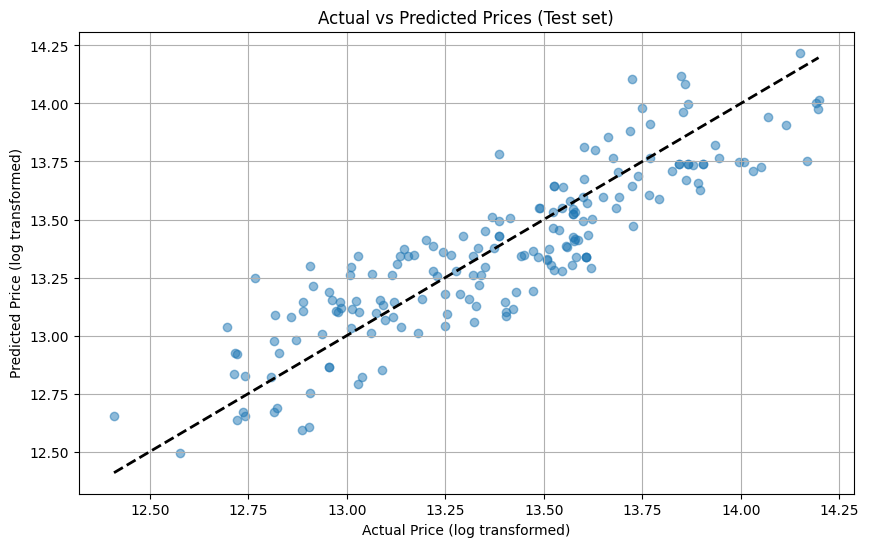

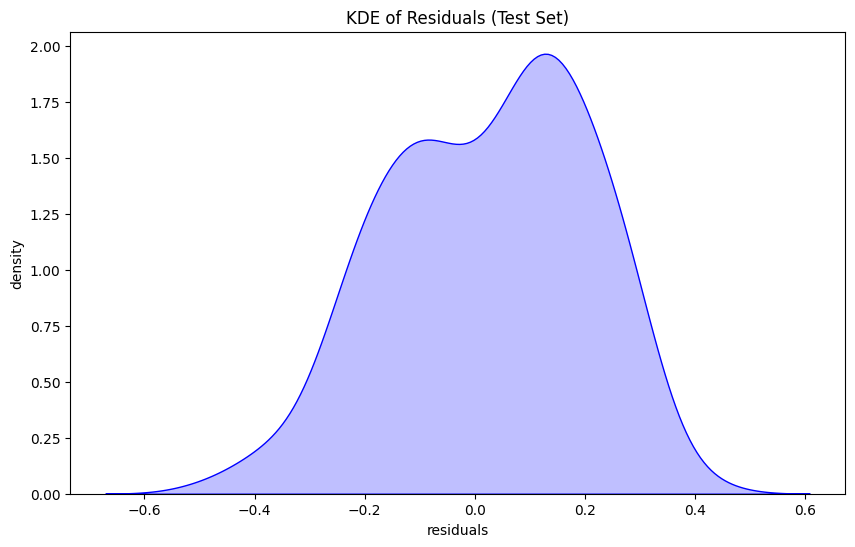


--- Model Evaluation (Strengths and Weaknesses) ---
R^2 on Test Set: 0.7745
RMSE on Test Set: 0.1816


In [42]:
# Question 2.6: Best model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting features into categorical and numerical
numerical_features = ['Make_Year', 'Mileage_Run_log', 'Seating_Capacity']
categorical_features = ['Make', 'Transmission_Type', 'Color', 'No_of_Owners', 'Fuel_Type', 'Body_Type', 'Transmission']

# Checking if categorical features exists in cleaned dataset
categorical_features = [col for col in categorical_features if col in cars_cleaned_dataset.columns]

# Defining all features (x) and target (y) using the cleaned data
X = cars_cleaned_dataset[categorical_features + numerical_features]
y = cars_cleaned_dataset['Price_log']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the best pipline model from previous step (step 5)
best_degree_polynomial_features = 3
preprocessor_best_model_pipeline = ColumnTransformer(
    transformers=[
        ('num', PolynomialFeatures(degree=best_degree_polynomial_features, include_bias=False), numerical_features), # Apply polynomial features to numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # Apply one-hot encoding to categorical columns
    ],
    remainder='passthrough' # Keep other columns (if any)
)

best_model_pipeline = Pipeline(steps = [('preprocessor', preprocessor_best_model_pipeline), ('regressor', LinearRegression())])
best_model_pipeline.fit(X_train, y_train)

# Evaluate the best model on the test set
y_test_pred_best_model = best_model_pipeline.predict(X_test)
r2_test_best_model = r2_score(y_test, y_test_pred_best_model)
rmse_test_best_model = np.sqrt(mean_squared_error(y_test, y_test_pred_best_model))

print(f'Best Model (Polynomial Features Degree {best_degree_polynomial_features} + Categorical) Performance on Test Set:')
print(f'  R^2: {r2_test_best_model:.4f}')
print(f'  RMSE: {rmse_test_best_model:.4f}')

# plotting predictions vs actuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_best_model, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price (log transformed)")
plt.ylabel("Predicted Price (log transformed)")
plt.title("Actual vs Predicted Prices (Test set)")
plt.grid(True)
plt.show()

# errors in the data set
residuals = y_test - y_test_pred_best_model

# KDE of the residuals
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, fill=True, color='blue')
plt.title("KDE of Residuals (Test Set)")
plt.xlabel("residuals")
plt.ylabel("density")
plt.show()

# Checking the strenths and weaknesses of the model
print("\n--- Model Evaluation (Strengths and Weaknesses) ---")
print(f"R^2 on Test Set: {r2_test_best_model:.4f}")
print(f"RMSE on Test Set: {rmse_test_best_model:.4f}")

Evaluation of Model's Strengths and Weaknesses: Model Evaluation (Test Set Results)

R^2: 0.7745

RMSE: 0.1816

The model achieved an R² of 0.7745 and an RMSE of 0.1816, indicating strong overall performance. The scatter plot shows that predicted prices align closely with the diagonal line, demonstrating a strong relationship between the true and predicted values. However, there is some spread at higher price levels, suggesting a bit of variability in the predictions.

The kernel density plot of residuals is approximately bell-shaped and centered around zero, showing that most errors are small and balanced. There is, however, slight skewness, meaning the residuals are not perfectly normally distributed.

Overall, this model explains a substantial portion of the variance in car prices and produces predictions that are generally well aligned with actual values. Some weaknesses remain, particularly in predicting higher-priced cars, and the residual distribution could be more ideally symmetrical.